#### In this notebook Random Forest model will be use to predict diameter, absorbance, and PL output.
* Optimization will be run to find the optimized estimator number 
* The skill of the model will be reported as an error in those predictions: 
    * MSE
    * R2

In [8]:
# Pandas library for the pandas dataframes
import pandas as pd    
import numpy as np
import scipy.stats as stats
import scipy

# Import Scikit-Learn library for decision tree models
import sklearn         
from sklearn import linear_model, datasets
from sklearn.utils import resample
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_validate, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error
from sklearn import metrics
from sklearn.utils import resample
from sklearn.linear_model import Lasso
from tqdm import tqdm


# Import plotting libraries
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt

# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 18})
from IPython.display import clear_output

# Command to automatically reload modules before executing cells
# not needed here but might be if you are writing your own library 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
#importing data
df = pd.read_csv('../../../Datasets/augmented_data.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Growth Temp (Celsius),Metal_mmol (mmol),Chalcogen_mmol (mmol),CA_mmol (mmol),Amines_mmol (mmol),Phosphines_mmol (mmol),S_I_amount (g),S_II_amount (g),...,x4_liquid parafin,x4_octadecene,x4_phenyl ether,x4_trioctylphosphine oxide,x5_None,x5_phosphinic acid,x5_trioctylphosphine oxide,Diameter_nm,Absorbance max (nm),PL max (nm)
0,0,0,1.105103,-0.437486,-0.243779,-0.525437,-0.416112,-0.165455,-0.123360,-0.302087,...,0,1,0,0,1,0,0,3.41,566.0,575.0
1,1,1,-0.062540,-0.472027,-0.436361,-0.305510,-0.498129,-0.375671,-0.241193,-0.302087,...,0,1,0,0,1,0,0,2.50,474.0,617.0
2,2,2,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.451959,-0.527427,-0.302087,...,0,1,0,0,1,0,0,1.99,450.4,497.0
3,3,3,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.445602,-0.527427,-0.302087,...,0,1,0,0,1,0,0,2.13,471.6,510.0
4,4,4,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.445602,-0.527427,-0.302087,...,0,1,0,0,1,0,0,2.27,486.0,517.0


In [4]:
feature_names = ['Growth Temp (Celsius)', 'Metal_mmol (mmol)', 'Chalcogen_mmol (mmol)',
             'Amines_mmol (mmol)', 'CA_mmol (mmol)', 'Phosphines_mmol (mmol)',
             'S_I_amount (g)', 'S_II_amount (g)', 'Time_min (min)',
             'x0_cadmium acetate', 'x0_cadmium acetate dihydrate',
             'x0_cadmium acetate dihydrate', 'x0_cadmium oxide',
             'x0_cadmium stearate', 'x0_dimethylcadmium', 'x1_None',
             'x1_benzoic acid', 'x1_dodecylphosphonic acid',
             'x1_ethylphosphonic acid', 'x1_lauric acid',
             'x1_myrstic acid', 'x1_oleic acid', 'x1_stearic acid',
             'x2_2-6-dimethylpyridine', 'x2_None', 'x2_aniline',
             'x2_benzylamine', 'x2_dioctylamine/hexadecylamine',
             'x2_dodecylamine', 'x2_heptylamine', 'x2_hexadecylamine',
             'x2_octadecylamine', 'x2_octylamine', 'x2_oleylamine',
             'x2_pyridine', 'x2_trioctylamine', 'x3_None', 'x3_diphenylphosphine',
             'x3_tributylphosphine', 'x3_trioctylphosphine',
             'x3_triphenylphosphine', 'x4_None', 'x4_liquid parafin',
             'x4_octadecene', 'x4_phenyl ether', 'x4_trioctylphosphine oxide',
             'x5_None', 'x5_phosphinic acid', 'x5_trioctylphosphine oxide']

target = ['Diameter_nm', 'Absorbance max (nm)', 'PL max (nm)']

## Size Prediction

In [10]:
#target is diameter_nm

X1 = df[feature_names]
Y1 = df[target[0]]
#splitting data into train and test data for sklearn function
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.25, random_state=8, shuffle = True)

In [13]:
R2_dict = {}
    
for estimator in tqdm(np.arange (1, 1000, 1)):
    clf_RF = RandomForestRegressor(n_estimators=estimator)
    clf_RF.fit(X_train1,y_train1)
    y_RF1 = clf_RF.predict(X_test1)
    MSE = mean_squared_error(y_test1, y_RF1)
    R2 = r2_score(y_test1, y_RF1)
    R2_dict[estimator] = R2
    
print("best estimator = ", max(R2_dict, key=R2_dict.get))

100%|██████████| 999/999 [17:07<00:00,  1.03s/it]

best estimator =  56


In [15]:
#for diameter
clf_RF = RandomForestRegressor(n_estimators=56,random_state=8)
clf_RF = clf_RF.fit(X_train1, y_train1)
y_RF1 = clf_RF.predict(X_test1)
MSE1 = mean_squared_error(y_test1, y_RF1)
R2_squared1 = r2_score(y_test1, y_RF1)
MAE1 = mean_absolute_error(y_test1, y_RF1)
print("Squared Prediction error MSE: ", MSE1) 
print('R Squared Score is:', R2_squared1)
print("Mean absolute error: ", MAE1) 

Squared Prediction error MSE:  0.6452828047442494
R Squared Score is: 0.6435671026453957
Mean absolute error:  0.42781162227602904


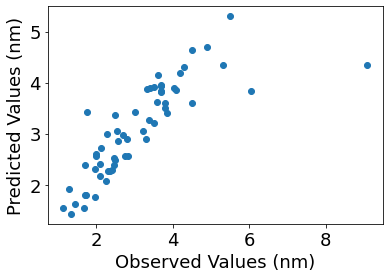

In [16]:
plt.figure()
plt.title("")
plt.plot(y_test1, y_RF1, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.show()

## Absorbance prediction

In [14]:
#target Absorbance max (nm)
X2= df[feature_names]
Y2= df[target[1]]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.25, random_state=8, shuffle = True)

In [ ]:
R2_dict = {}
    
for estimator in tqdm(np.arange (1, 1000, 1)):
    clf_RF = RandomForestRegressor(n_estimators=estimator)
    clf_RF.fit(X_train2,y_train2)
    y_RF2 = clf_RF.predict(X_test2)
    MSE = mean_squared_error(y_test2, y_RF2)
    R2 = r2_score(y_test2, y_RF2)
    R2_dict[estimator] = R2
    
print("best estimator = ", max(R2_dict, key=R2_dict.get))

In [ ]:
# for absorbance max (nm)

clf_RF = RandomForestRegressor(n_estimators=50,random_state=8)
clf_RF = clf_RF.fit(X_train2, y_train2)
y_RF2 = clf_RF.predict(X_test2)
MSE2 = mean_squared_error(y_test2, y_RF2)
R2_squared2 = r2_score(y_test2, y_RF2)
print("Squared Prediction error MSE: ", MSE2) 
print('R Squared Score is:', R2_squared2)

In [ ]:
plt.figure()
plt.title("")
plt.plot(y_test1, y_RF2, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.show()

## PL prediction

In [8]:
#target PL max (nm)
X3= df[feature_names]
Y3= df[target[2]]

In [9]:
#splitting data into train and test data for sklearn function

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.25, random_state=8, shuffle = True)

In [10]:
R2_dict = {}
    
for estimator in tqdm(np.arange (1, 1000, 1)):
    clf_RF = RandomForestRegressor(n_estimators=estimator)
    clf_RF.fit(X_train3,y_train3)
    y_RF3 = clf_RF.predict(X_test3)
    MSE = mean_squared_error(y_test3, y_RF3)
    R2 = r2_score(y_test3, y_RF3)
    R2_dict[estimator] = R2
    
print("best estimator = ", max(R2_dict, key=R2_dict.get))

Squared Prediction error MSE:  0.6372143239446779
R Squared Score is: 0.6480238648084308
Mean absolute error:  0.431191186440678


In [10]:
#for PL max (nm)

clf_RF = RandomForestRegressor(n_estimators=50,random_state=8)
clf_RF = clf_RF.fit(X_train3, y_train3)
y_RF3 = clf_RF.predict(X_test3)
MSE3 = mean_squared_error(y_test3, y_RF3)
R2_squared3 = r2_score(y_test3, y_RF3)
print("Squared Prediction error MSE: ", MSE3) 
print('R Squared Score is:', R2_squared3)

Squared Prediction error MSE:  568.96577605144
R Squared Score is: 0.674864572262792


In [ ]:
plt.figure()
plt.title("")
plt.plot(y_test1, y_RF3, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.show()